## Predict heart disease or not in Patient
<br>this notebook will use to identify the a patient heart disease.
<br><br><br>
> The following step will be follow.

1) problem definition
2) data
3) Evaluation
4) Features
5) Modeling
6) Experimentation


## 1) Problem definition
<br>
Find out the heart disease of the patient that weather a patient has heart disease or not on the base of patient recored.

## 2) Data
<br>
The Orignal Data came from the cleavland database of the Machine learning Repository.

it is structure data

## 3) Evaluation
if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4) Features
This is where you'll get different information about each of the features in your data.
you have to understand it by self or get understand yourself by the matter expert person mean specialist.

## Import basic tools for the data analysis and manipulation
`Like: Pandas, Numpy, matplotlib`

In [1]:
## Regular EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

## Data Exploratory Analysis or DEA
The goal here is to find out more about the data and become a subject matter export on the dataset you're working on.

1. What Question(s) are you tring to solve?
2. what kind of data do we have adn how we treat different types?
3. what's missing from the data and how you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

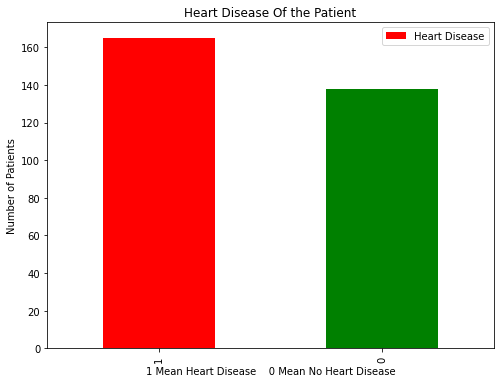

In [5]:
df['target'].value_counts().plot(kind="bar", color=["red","green"],figsize=(8,6))
plt.title("Heart Disease Of the Patient")
plt.xlabel("1 Mean Heart Disease    0 Mean No Heart Disease");
plt.ylabel("Number of Patients")
plt.legend(["Heart Disease","No Heart Disease"]);


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

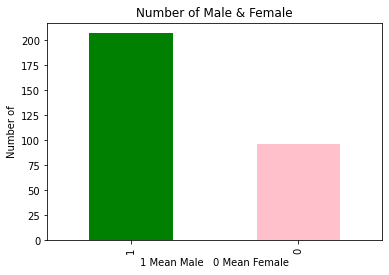

In [10]:
df['sex'].value_counts().plot(kind="bar", color=["green","pink"])
plt.title("Number of Male & Female")
plt.xlabel("1 Mean Male   0 Mean Female")
plt.ylabel("Number of");

In [11]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


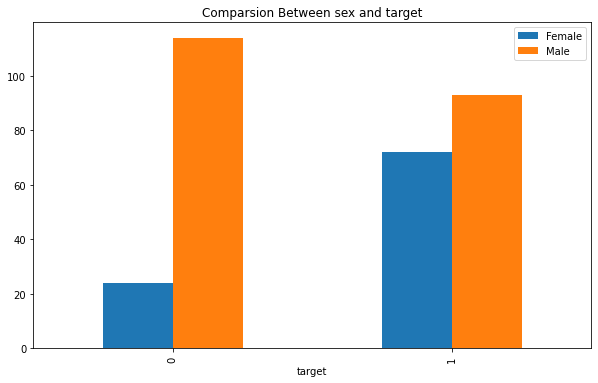

In [12]:
pd.crosstab(df['target'],df['sex']).plot(kind="bar",figsize=(10,6))
plt.title("Comparsion Between sex and target")
plt.legend(["Female","Male"]);

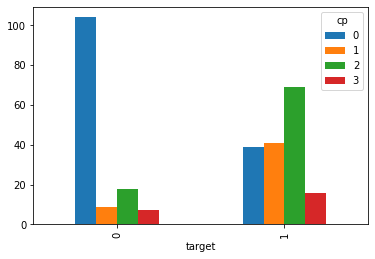

In [13]:
pd.crosstab(df['target'],df['cp']).plot(kind="bar");

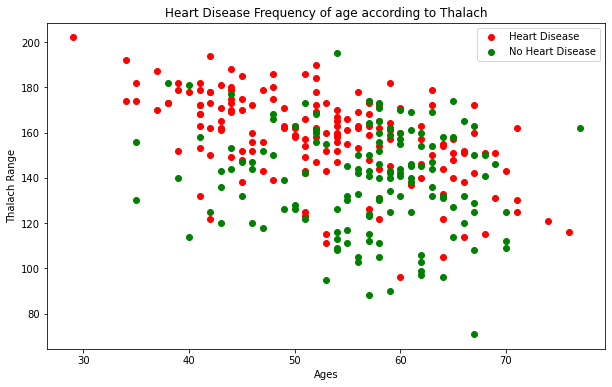

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c="red");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green');

plt.title("Heart Disease Frequency of age according to Thalach")
plt.legend(["Heart Disease","No Heart Disease"])
plt.xlabel("Ages")
plt.ylabel("Thalach Range");

## 5: Modeling 

## 5.1: split your data into features and target or split independed and depended data

In [15]:
X=df.drop("target",axis=1)
Y=df['target']

In [16]:
df.shape,X.shape,Y.shape

((303, 14), (303, 13), (303,))

## 5.2 split your data into train and test dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 5.3 Choose the Estimator according to your problem using machine learning map cheetsheet.
we'll train it  (find the patterns) on the training set.
we'll test it (using the patterns) on the test set.

We're going to try 3 different machine learning models.

1. Logistic regression
2. k-Nearest Neighbours classifier.
3. Random Forest classifier.

In [20]:
# import the scikitlearn model.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
# put the model in dictionary.
models={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()}

#create a funcation to fit and score models

def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
        Fits and Evaluate Given Machine learning Models.
        models: a dictionary of different Scikit-learn machine learning model.
        X_train: train data (no labels) 
        X_test : test data (no labels)
        Y_train: training labels
        Y_test: testing lables
    """
    #set random seed
    np.random.seed(42)
    #make a dictionary to keep model score.
    model_score={}
    #loop through models.
    for name,model in models.items():
        #fit the model to data
        model.fit(X_train,Y_train)
        #evaluate and append it score to the model_score dictionary
        model_score[name]=model.score(X_test,Y_test)
    return model_score

## Experimental Phase

In [22]:

score_model=fit_and_score(models=models,X_train=x_train,X_test=x_test,Y_train=y_train,Y_test=y_test)
score_model

C:\first_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8032786885245902}

## comparsion of the model

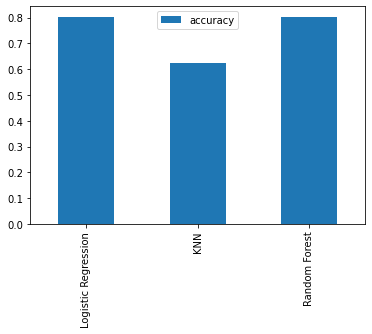

In [23]:
comparsion=pd.DataFrame(score_model,index=["accuracy"])
comparsion.T.plot.bar();

## Model Tuning & Improving

* HyperParameter Tuning
* Feature Importance
* confusion Matrix
* cross-Validation
* Precision
* Recall
* F1 Score
* Classification report
* Roc Curve
* Area Under the Curve (AUC)


## HyperParameter Tuning ( By Hand )

In [24]:
# let Tune kNN

# let create two list for storing different neighbor score.
train_score=[]
test_score=[]

# create a list of different  values  for n_neighbors

neighbors=range(1,21)

#setup knn instance

knn=KNeighborsClassifier()


# loop through the different  n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(x_train,y_train)
    
    #update the train socre list
    train_score.append(knn.score(x_train,y_train))
    
    #update the test core list
    
    test_score.append(knn.score(x_test,y_test))


In [25]:
max(train_score)

1.0

In [26]:
max(test_score)

0.6557377049180327

This is the max score of test 65.57%


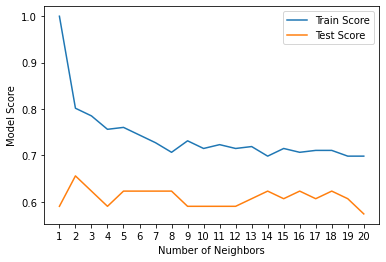

In [27]:
plt.plot(neighbors,train_score,label="Train Score")
plt.plot(neighbors,test_score,label="Test Score")
plt.xticks(range(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();
print(f"This is the max score of test {max(test_score)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:

* logisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [28]:
# create a hyperparameter grid for the LogisticRegression.
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}


# create a hyperparameter grid for the RandomForestClassifier.
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

... Now Tune the model using RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# Tune LogisticRegression()
np.random.seed(42)

#setup random hyperparameter search for the logisticRegression

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                              verbose=True
                             )

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [31]:
rs_log_reg.score(x_test,y_test) #logistic Regression

0.7868852459016393

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier.

In [32]:
#setup the random seed.
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [34]:
rs_rf.score(x_test,y_test)

0.7704918032786885

... We did until.
* by hand tuning
* through the RandomizedSearchCv

Now let's do it through the GridSearchCV

## GridSearchCV Tuning in hyperparameter tuning

In [35]:
# create a hyperparameter grid for the LogisticRegression.
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

gv_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gv_log_reg.fit(x_train,y_train)
            


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
gv_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [37]:
gv_log_reg.score(x_test,y_test)

0.7868852459016393

## Evaluate your tuned model learning classifier, beyond the Accuracy.

* ROC (Reciver Operating Characteristic) Curve and AUC () Curve
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-Score

In [38]:
# Make Predication with Tuned Model.
y_preds=gv_log_reg.predict(x_test)

In [39]:
y_preds

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
y_test

149    1
210    0
214    0
16     1
167    0
      ..
83     1
61     1
154    1
38     1
129    1
Name: target, Length: 61, dtype: int64

## `Draw the ROC Curve`

first import plot_roc_curve from the sklearn

In [41]:
from sklearn.metrics import plot_roc_curve

C:\first_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


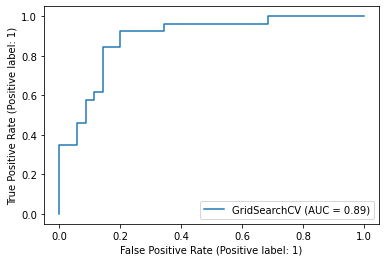

In [42]:
plot_roc_curve(gv_log_reg,x_test,y_test);

## `confusion matrix`


In [56]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[24 11]
 [ 2 24]]


C:\first_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


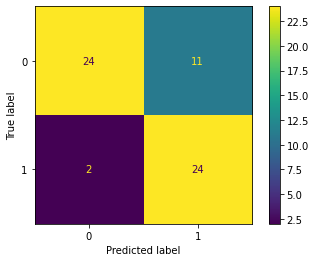

In [57]:
# download the seaborn for the more visual representation.
#from seaborn import sns
plot_confusion_matrix(gv_log_reg,x_test,y_test)

## `classification report`

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        35
           1       0.69      0.92      0.79        26

    accuracy                           0.79        61
   macro avg       0.80      0.80      0.79        61
weighted avg       0.82      0.79      0.79        61



## Calculate evalatuion metrics using cross-validation.

We're going to calculate accuracy, precision, recall, F1_score of our model using cross-validation and to do so we'll bg using `cross_val_score()`

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
gv_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [49]:
# create a new classifier with best parameter.

clf=LogisticRegression(C=0.08858667904100823,
                      solver="liblinear")

In [50]:
# cross-validated accuracy.
cv_accuracy=cross_val_score(clf,
                           X,
                           Y,
                           cv=5,
                           scoring="accuracy")
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.834808743169399

In [51]:
# cross-validated precision.
cv_precision=cross_val_score(clf,
                           X,
                           Y,
                           cv=5,
                           scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8182683982683983

In [52]:
# cross-validated recall.
cv_recall=cross_val_score(clf,
                           X,
                           Y,
                           cv=5,
                           scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9030303030303031

In [53]:
# cross-validated f1-score
cv_f1=cross_val_score(clf,
                           X,
                           Y,
                           cv=5,
                           scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8572876223964057

In [54]:
cv_graph=pd.DataFrame({"Accuracy":cv_accuracy,
                      "Precision":cv_precision,
                      "Recall":cv_recall,
                      "F1":cv_f1},index=[0])

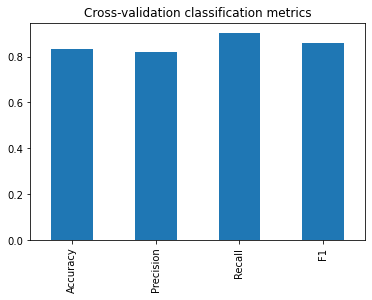

In [55]:
cv_graph.T.plot.bar(title="Cross-validation classification metrics",legend=False);